In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 


**Loading DataSet**

In [34]:
data_path=r"C:\Users\hp\solar-challenge-week1\data\benin-malanville.csv"
Benin_Dataset=pd.read_csv(data_path)

***Summary Statistics & Missing-Value Report***

In [35]:
Benin_Dataset.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [36]:
Benin_Dataset.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [37]:
Benin_Dataset.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [38]:
missing_report = Benin_Dataset.isna().sum()
threshold = 0.05 * len(Benin_Dataset)
missing_over_5_percent = missing_report[missing_report > threshold]
print("Columns with more than 5% missing values:")
print(missing_over_5_percent)

Columns with more than 5% missing values:
Comments    525600
dtype: int64


***Outlier Detection & Basic Cleaning***

In [39]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Compute Z-scores and take absolute value
z_scores = Benin_Dataset[columns_to_check].apply(zscore).abs()

# Flag rows with outliers (Z > 3)
outliers = (z_scores > 3).any(axis=1)

# See how many rows are outliers
print("Number of outliers:", outliers.sum())

Number of outliers: 7740


In [ ]:
for col in columns_to_check:
    median_val = Benin_Dataset[col].median()
    Benin_Dataset.loc[z_scores[col] > 3, col] = median_val

In [41]:
# Fill missing values with median in important columns
Benin_Dataset[columns_to_check] = Benin_Dataset[columns_to_check].fillna(Benin_Dataset[columns_to_check].median())

In [42]:
Benin_Dataset.to_csv("data/benin_clean.csv", index=False)


In [43]:
Benin_Dataset.shape

(525600, 19)

***Time Series Analysis***

c:\Users\hp\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


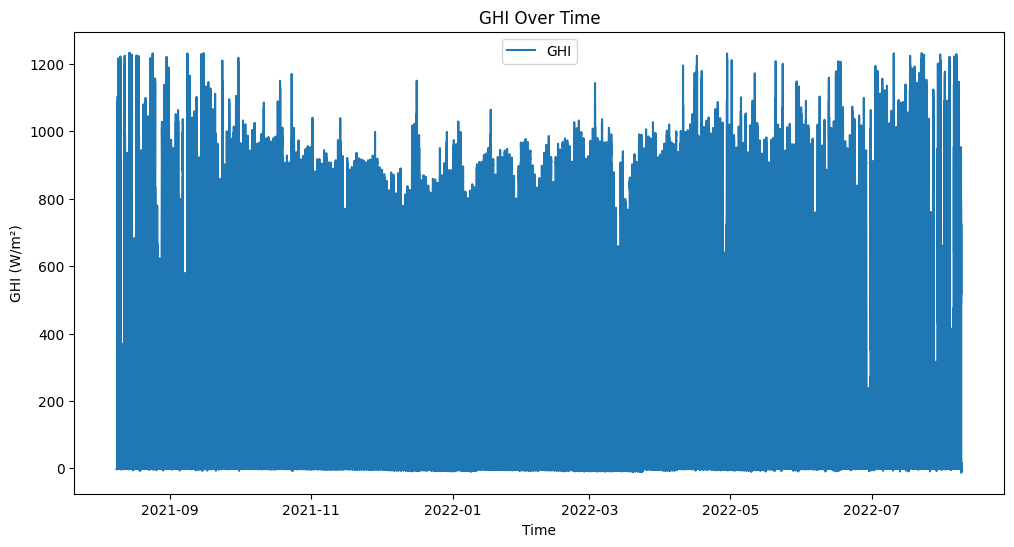

In [45]:
# Convert timestamp column to datetime (adjust column name as per your dataset)
Benin_Dataset['Timestamp'] = pd.to_datetime(Benin_Dataset['Timestamp'])

# Set Timestamp as index for easier plotting
Benin_Dataset.set_index('Timestamp', inplace=True)

# Plot GHI over time
plt.figure(figsize=(12,6))
plt.plot(Benin_Dataset.index, Benin_Dataset['GHI'], label='GHI')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('GHI Over Time')
plt.legend()
plt.show()

# You can repeat similarly for DNI, DHI, Tamb


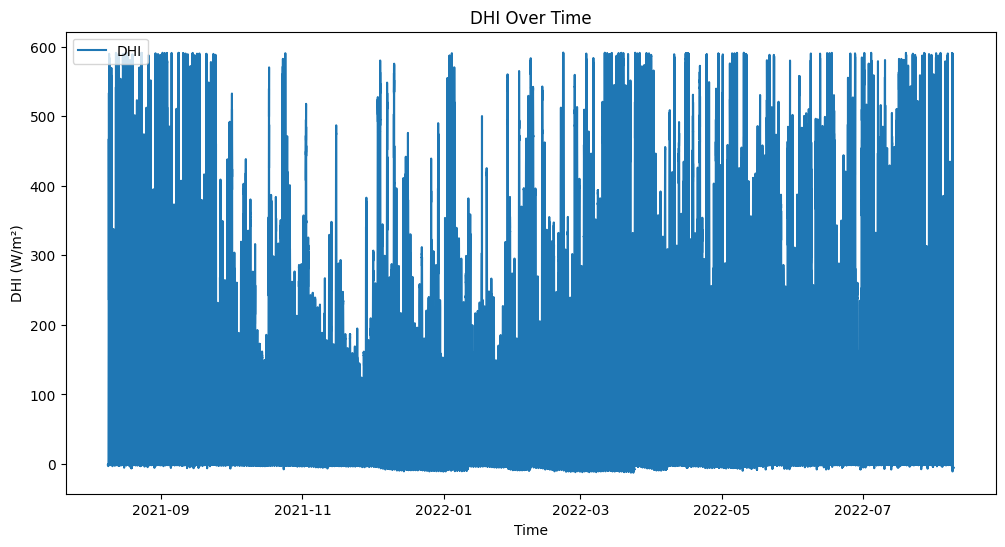

In [47]:
# Plot DHI over time
plt.figure(figsize=(12,6))
plt.plot(Benin_Dataset.index, Benin_Dataset['DHI'], label='DHI')
plt.xlabel('Time')
plt.ylabel('DHI (W/m²)')
plt.title('DHI Over Time')
plt.legend()
plt.show()

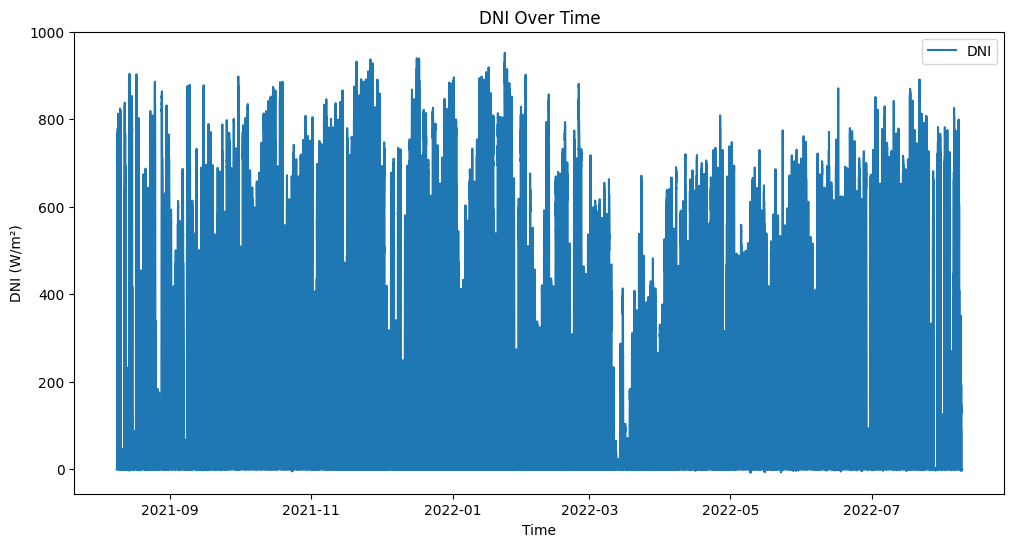

In [48]:
# Plot DNI over time
plt.figure(figsize=(12,6))
plt.plot(Benin_Dataset.index, Benin_Dataset['DNI'], label='DNI')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')
plt.title('DNI Over Time')
plt.legend()
plt.show()

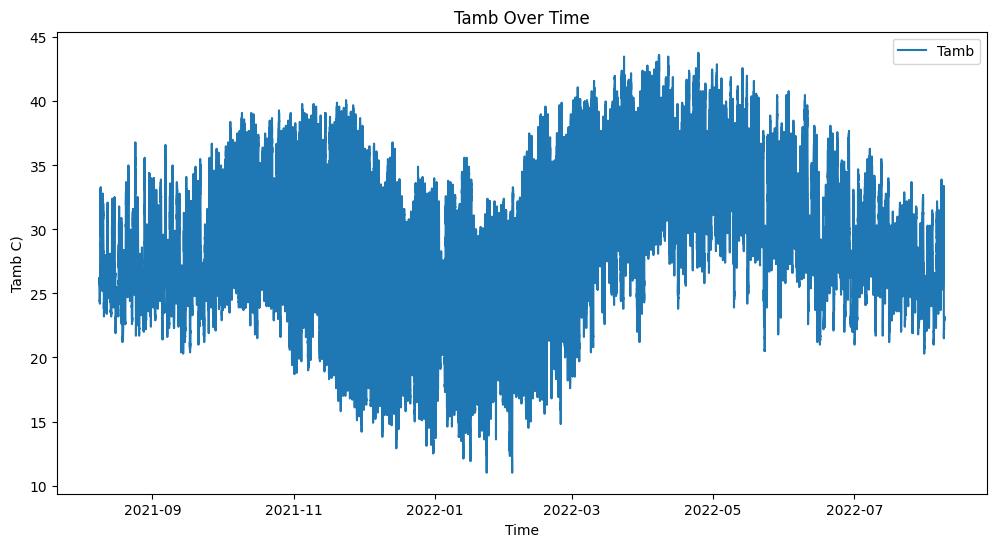

In [52]:
# Plot Tamp over time
plt.figure(figsize=(12,6))
plt.plot(Benin_Dataset.index, Benin_Dataset['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Tamb C)')
plt.title('Tamb Over Time')
plt.legend()
plt.show()

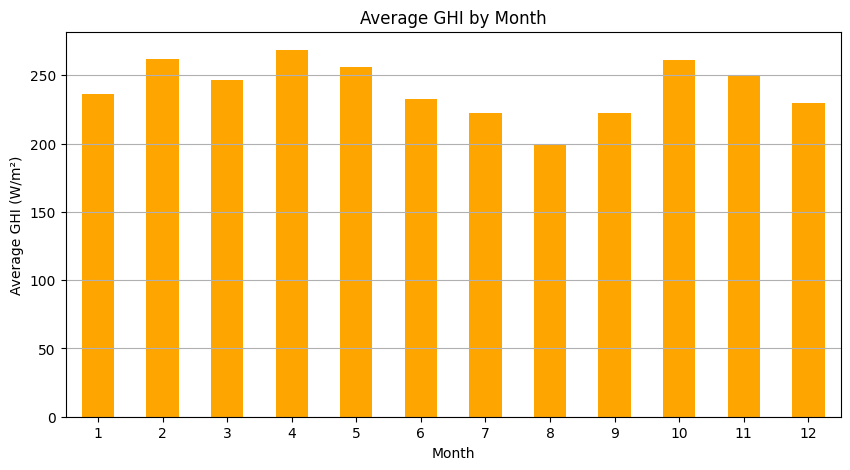

In [53]:
# Add a 'Month' column
Benin_Dataset['Month'] = Benin_Dataset.index.month

# Average GHI by month
monthly_ghi = Benin_Dataset.groupby('Month')['GHI'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


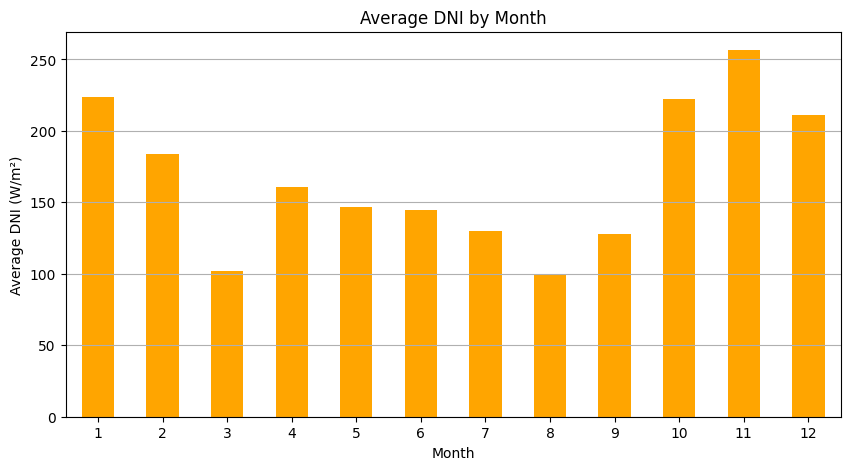

In [54]:
# Add a 'Month' column
Benin_Dataset['Month'] = Benin_Dataset.index.month

# Average DNI by month
monthly_ghi = Benin_Dataset.groupby('Month')['DNI'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average DNI by Month')
plt.xlabel('Month')
plt.ylabel('Average DNI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


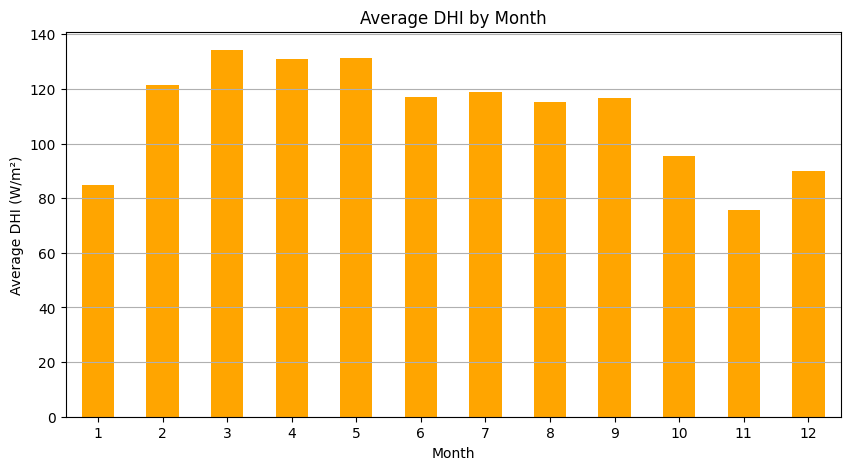

In [55]:
# Add a 'Month' column
Benin_Dataset['Month'] = Benin_Dataset.index.month

# Average DHI by month
monthly_ghi = Benin_Dataset.groupby('Month')['DHI'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average DHI by Month')
plt.xlabel('Month')
plt.ylabel('Average DHI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


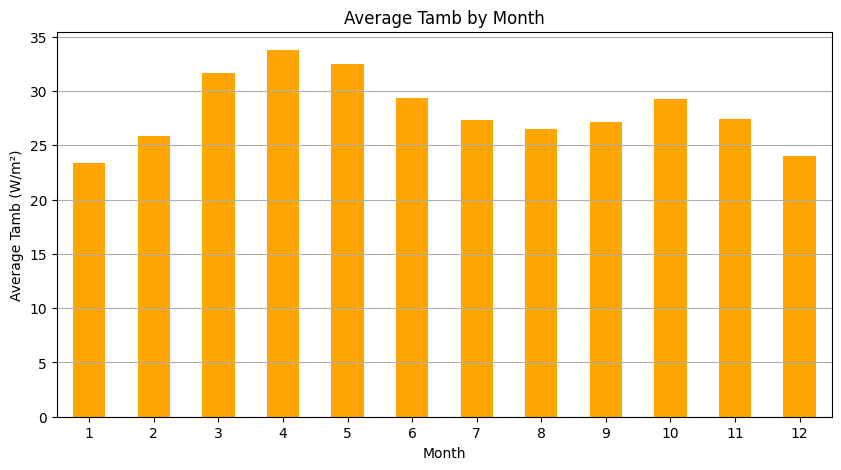

In [56]:
# Add a 'Month' column
Benin_Dataset['Month'] = Benin_Dataset.index.month

# Average Tamb by month
monthly_ghi = Benin_Dataset.groupby('Month')['Tamb'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average Tamb by Month')
plt.xlabel('Month')
plt.ylabel('Average Tamb (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


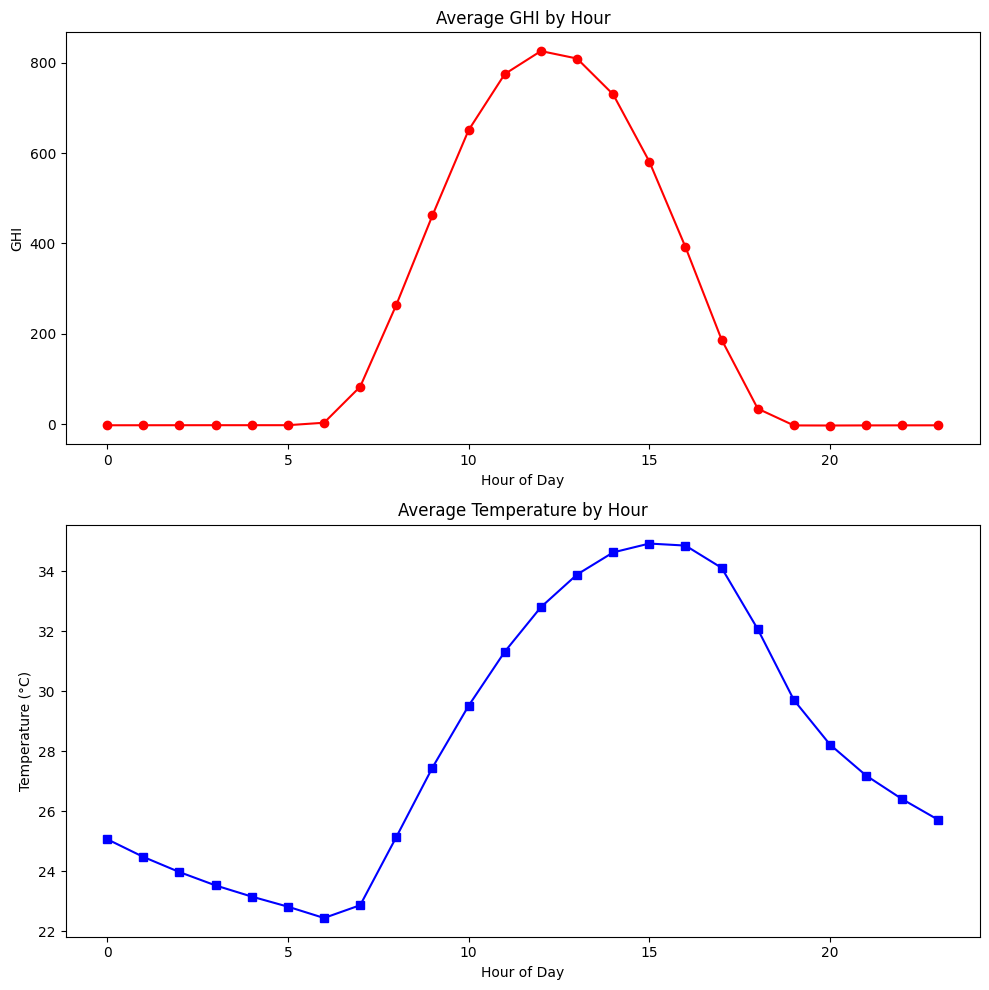

In [57]:
# Add 'Hour' column
Benin_Dataset['Hour'] = Benin_Dataset.index.hour

# Average values by hour
hourly_ghi = Benin_Dataset.groupby('Hour')['GHI'].mean()
hourly_temp = Benin_Dataset.groupby('Hour')['Tamb'].mean()

# Plot both in subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(hourly_ghi, marker='o', color='red')
axs[0].set_title('Average GHI by Hour')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('GHI')

axs[1].plot(hourly_temp, marker='s', color='blue')
axs[1].set_title('Average Temperature by Hour')
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


c:\Users\hp\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


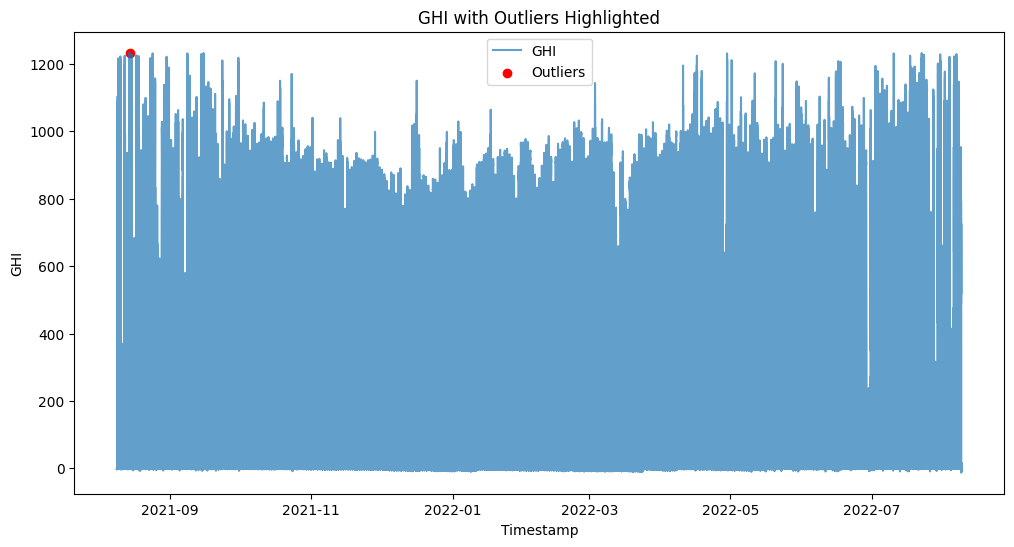

In [ ]:
# Plot a snippet of time series with outliers
plt.figure(figsize=(12,6))
plt.plot(Benin_Dataset.index, Benin_Dataset['GHI'], label='GHI', alpha=0.7)

# Highlight suspected outliers (Z > 3)
outliers = Benin_Dataset[np.abs(zscore(Benin_Dataset['GHI'])) > 3]
plt.scatter(outliers.index, outliers['GHI'], color='red', label='Outliers')

plt.title('GHI with Outliers Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.legend()
plt.show()


**Cleaning Impact**

In [68]:

# Define which columns to check for outliers
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute z-scores
z_scores = Benin_Dataset[cols_to_check].apply(zscore)

# Flag outliers: if any value across the row has |z| > 3, it's an outlier
Benin_Dataset['Cleaning_Flag'] = (z_scores.abs() > 3).any(axis=1)


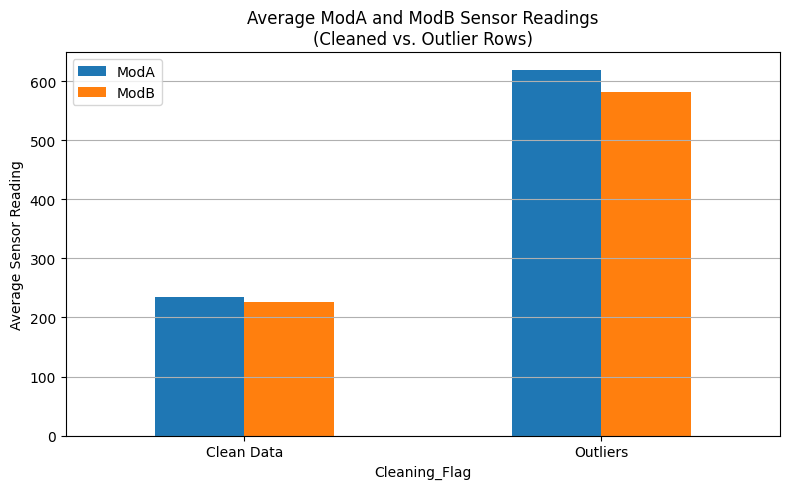

In [69]:
import matplotlib.pyplot as plt

# Group by cleaning flag (False = clean, True = outlier)
grouped = Benin_Dataset.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean()

# Bar plot
grouped.plot(kind='bar', figsize=(8,5))
plt.title('Average ModA and ModB Sensor Readings\n(Cleaned vs. Outlier Rows)')
plt.xticks([0, 1], labels=['Clean Data', 'Outliers'], rotation=0)
plt.ylabel('Average Sensor Reading')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Correlation & Relationship Analysis**

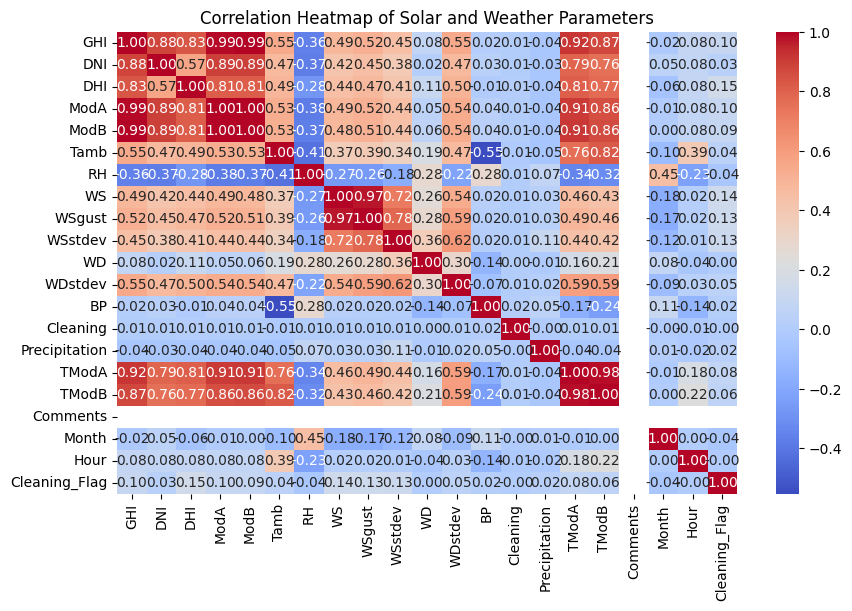

In [70]:
# Compute correlation matrix
correlation_matrix = Benin_Dataset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Solar and Weather Parameters")
plt.show()


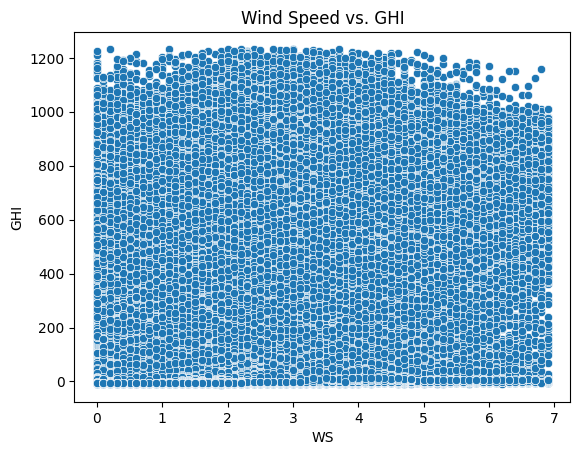

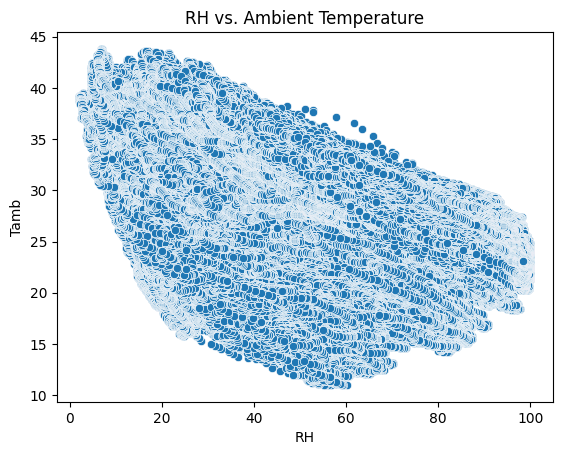

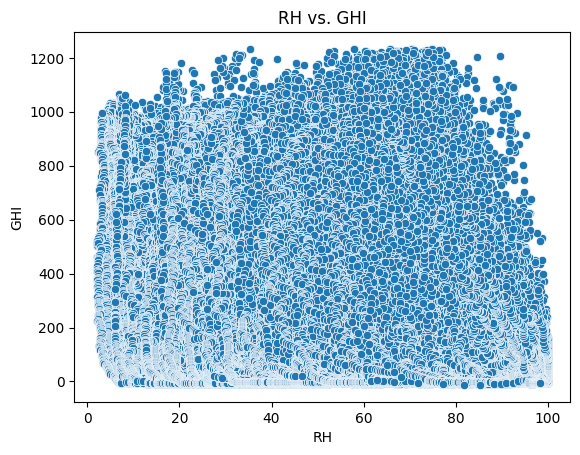

In [71]:
# Scatter: Wind speed vs. GHI
sns.scatterplot(data=Benin_Dataset, x='WS', y='GHI')
plt.title("Wind Speed vs. GHI")
plt.show()

# Scatter: Relative Humidity vs. Ambient Temperature
sns.scatterplot(data=Benin_Dataset, x='RH', y='Tamb')
plt.title("RH vs. Ambient Temperature")
plt.show()

# Scatter: Relative Humidity vs. GHI
sns.scatterplot(data=Benin_Dataset, x='RH', y='GHI')
plt.title("RH vs. GHI")
plt.show()


**Wind & Distribution Analysis**

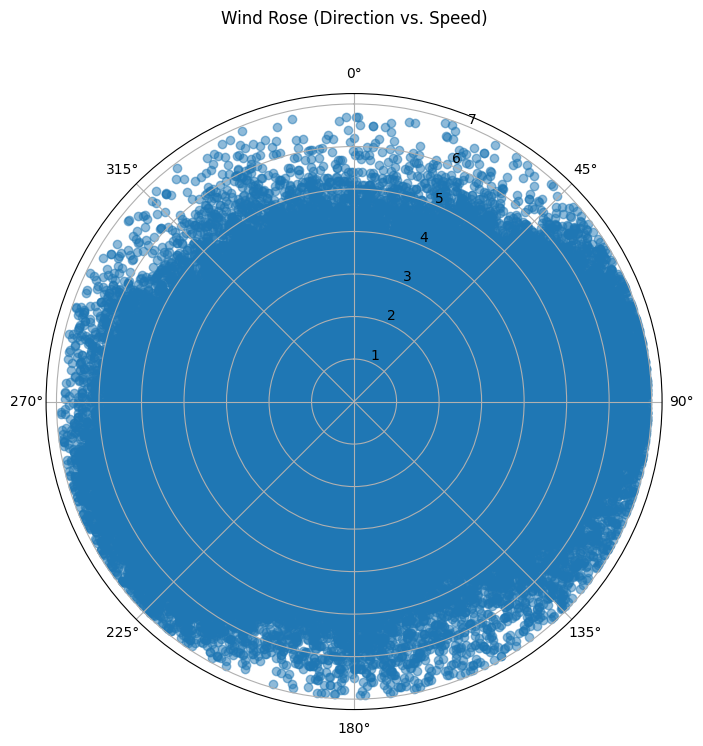

In [74]:
# Convert Wind Direction from degrees to radians
Benin_Dataset['WD_rad'] = np.deg2rad(Benin_Dataset['WD'])

# Polar plot (radial bar)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(Benin_Dataset['WD_rad'], Benin_Dataset['WS'], alpha=0.5)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Wind Rose (Direction vs. Speed)', y=1.1)
plt.show()


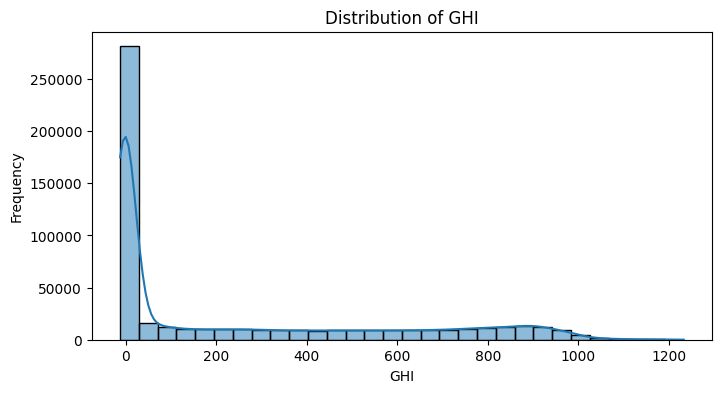

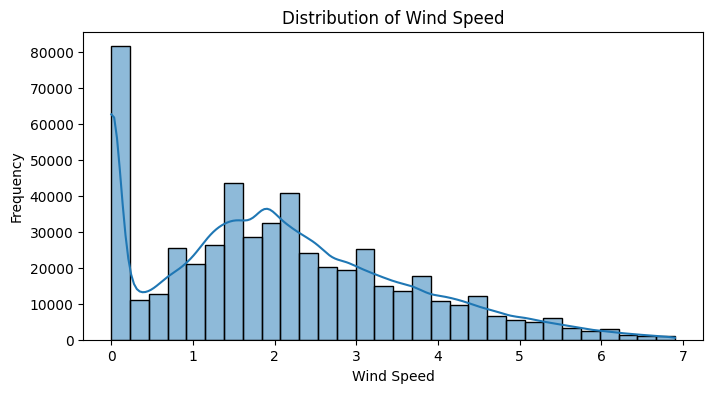

In [75]:
# Histogram for GHI
plt.figure(figsize=(8, 4))
sns.histplot(Benin_Dataset['GHI'], bins=30, kde=True)
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS (Wind Speed)
plt.figure(figsize=(8, 4))
sns.histplot(Benin_Dataset['WS'], bins=30, kde=True)
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.show()


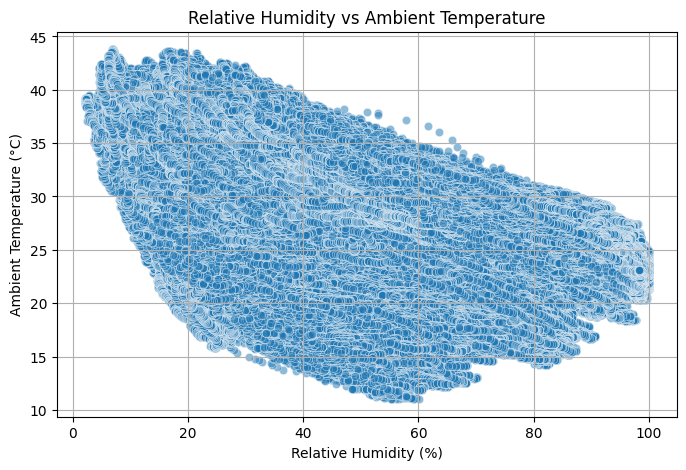

In [76]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Benin_Dataset, x='RH', y='Tamb', alpha=0.5)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.show()


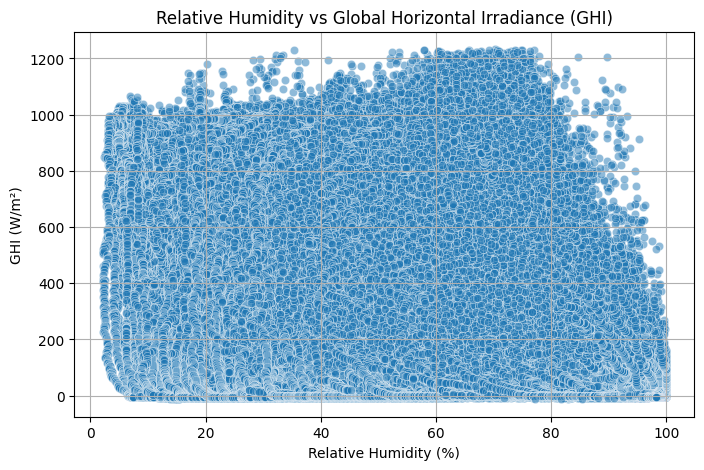

In [77]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Benin_Dataset, x='RH', y='GHI', alpha=0.5)
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14768\1079354156.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


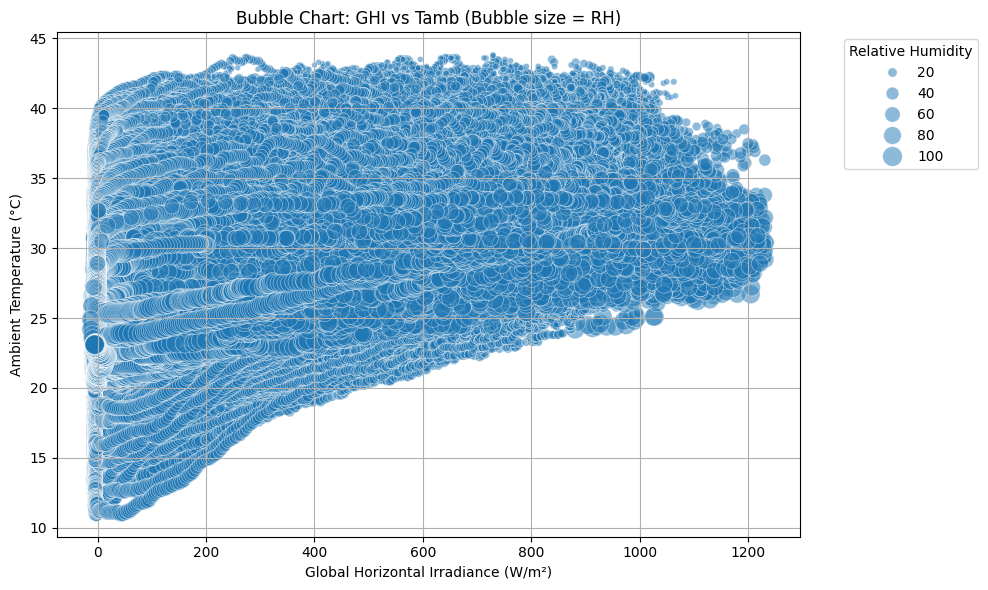

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Benin_Dataset,
    x='GHI',
    y='Tamb',
    size='RH',
    sizes=(10, 200),  # control bubble size
    alpha=0.5,
    palette='viridis'
)
plt.title('Bubble Chart: GHI vs Tamb (Bubble size = RH)')
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.legend(title='Relative Humidity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
